<a href="https://colab.research.google.com/github/Educat8n/Invited_Talks/blob/master/ODSC-West-2022/Vqa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Keras 
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
# IMAGE
#
# Define CNN for visual processing
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
		input_shape=(224, 224, 3)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.Conv2D(256, (3, 3), activation='relu'))
cnn_model.add(layers.Conv2D(256, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Flatten())
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 111, 111, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                    

In [ ]:
#define the visual_model with proper input
image_input = layers.Input(shape=(224, 224, 3))
visual_model = cnn_model(image_input)

In [ ]:
# TEXT
#
#define the RNN model for text processing
question_input = layers.Input(shape=(100,), dtype='int32')
emdedding = layers.Embedding(input_dim=10000, output_dim=256, 
	input_length=100)(question_input)
encoded_question = layers.LSTM(256)(emdedding)


In [ ]:
# combine the encoded question and visual model
merged = layers.concatenate([encoded_question, visual_model])
#attach a dense network at the end
output = layers.Dense(1000, activation='softmax')(merged)

In [ ]:
#get the combined model
vqa_model = models.Model(inputs=[image_input, question_input], outputs=output)
vqa_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 100, 256)     2560000     ['input_3[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 lstm_1 (LSTM)                  (None, 256)          525312      ['embedding_1[0][0]']        

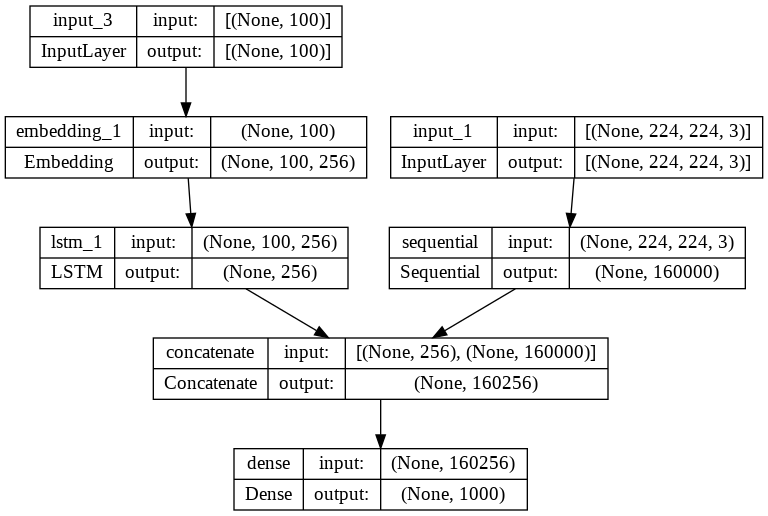

In [ ]:
tf.keras.utils.plot_model(vqa_model, to_file="model.png", show_shapes=True)